In [1]:
import sys
import os
import numpy as np
from matplotlib import pyplot as plt
from keras.layers import Lambda, Input, GaussianNoise,concatenate, Dense, Dropout, Conv2D, Add, UpSampling2D, Dot, Conv2DTranspose, Activation, Reshape, InputSpec, LeakyReLU, Flatten, BatchNormalization, SpectralNormalization, GlobalAveragePooling2D
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Conv1D, Conv2D, Conv3D, Conv2DTranspose, Embedding
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
sys.path.append(os.path.abspath("../.."))
from src.preprocessing.preprocessing_functions import *
from sklearn.utils.class_weight import compute_class_weight
from keras.applications import VGG19, VGG16


In [2]:
x_train = np.load('/Users/inescunha/Documents/GitHub/AI4CellFate/data/final_split/augmented_x_train.npy')
y_train = np.load('/Users/inescunha/Documents/GitHub/AI4CellFate/data/final_split/augmented_y_train.npy')
x_val = np.load('/Users/inescunha/Documents/GitHub/AI4CellFate/data/final_split/x_val.npy')
y_val = np.load('/Users/inescunha/Documents/GitHub/AI4CellFate/data/final_split/y_val.npy')
x_test = np.load('/Users/inescunha/Documents/GitHub/AI4CellFate/data/final_split/x_test.npy')
y_test = np.load('/Users/inescunha/Documents/GitHub/AI4CellFate/data/final_split/y_test.npy')

## VGG16

In [12]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

num_classes = len(np.unique(y_train))
# Build a new model for your task
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling to flatten feature maps
x = Dense(512, activation='relu')(x)  
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)
# Final model
clf_model = Model(inputs=base_model.input, outputs=outputs)

# Freeze VGG19 layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False

tf.keras.utils.set_random_seed(46)

clf_model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.0001, clipvalue=0.5), metrics=["accuracy"])

clf_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,978,370 (57.14 MB)

 Trainable params: 263,682 (1.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [38]:
def process_for_vgg(image): # the input is (20, 20)
    # Pad to make it the minimum size for VGG (32, 32, 3)
    image = np.expand_dims(image, axis=-1)
    padded_x_train = np.pad(image, ((0, 0), (6, 6), (6, 6), (0, 0)), mode='constant')
    padded_x_train = np.concatenate((padded_x_train, padded_x_train), axis=-1)
    padded_x_train = np.concatenate((padded_x_train, padded_x_train[:,:,:,0:1]), axis=-1)
    return padded_x_train

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.5004 - loss: 0.7628 - val_accuracy: 0.6679 - val_loss: 0.6296
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.5738 - loss: 0.6876 - val_accuracy: 0.6787 - val_loss: 0.5979
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.6088 - loss: 0.6739 - val_accuracy: 0.6715 - val_loss: 0.5984
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.6174 - loss: 0.6584 - val_accuracy: 0.6787 - val_loss: 0.5814
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.6259 - loss: 0.6366 - val_accuracy: 0.6679 - val_loss: 0.5838
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.6358 - loss: 0.6286 - val_accuracy: 0.6570 - val_loss: 0.5831
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.6580 - loss: 0.6233 - val_accuracy: 0.6606 - val_loss: 0.5774
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.6650 - loss: 0.6072 - val_accuracy: 0.

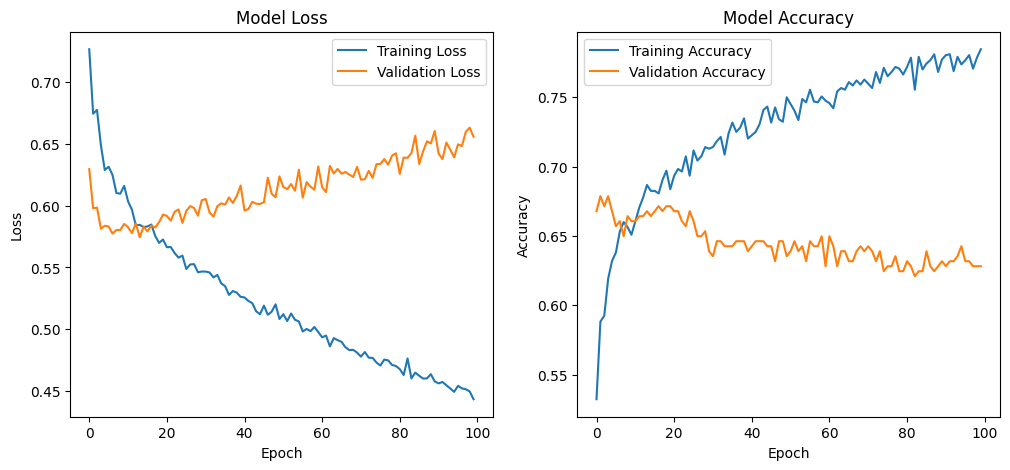

In [39]:
# class_weights = compute_class_weight('balanced', classes=np.unique(y_train.flatten()), y=y_train.flatten())
# class_weights = dict(enumerate(class_weights))

history = clf_model.fit(process_for_vgg(x_train), y_train, batch_size=32, epochs=100, validation_data=(process_for_vgg(x_val), y_val))

plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
[[0.67672414 0.32327586]
 [0.42222222 0.57777778]]


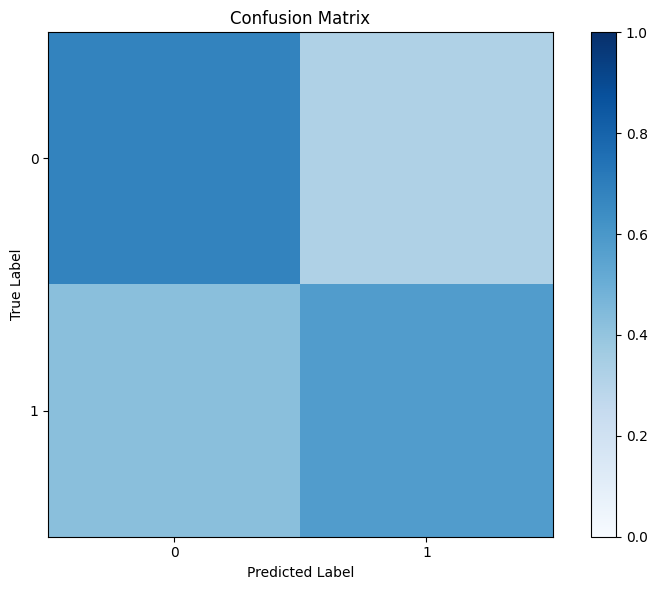

In [41]:
num_classes = len(np.unique(y_train))
y_pred = clf_model.predict(process_for_vgg(x_test))
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

class_sums = cm.sum(axis=1, keepdims=True)
conf_matrix_normalized = cm / class_sums

print(conf_matrix_normalized)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_normalized, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes))
plt.yticks(tick_marks, range(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [ ]:
# np.save("imagenet_conf_matrix_seed46.npy", conf_matrix_normalized)

## ResNet50

In [20]:
from keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

num_classes = len(np.unique(y_train))
# Build a new model for your task
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling to flatten feature maps
x = Dense(512, activation='relu')(x)  
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)
# Final model
clf_model = Model(inputs=base_model.input, outputs=outputs)

# Freeze ResNet50 layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False

tf.keras.utils.set_random_seed(42)

clf_model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.0001, clipvalue=0.5), metrics=["accuracy"])

clf_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 24,637,826 (93.99 MB)

 Trainable params: 1,050,114 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [21]:
def process_for_resnet(image): # the input is (20, 20)
    # Pad to make it the minimum size for ResNet (32, 32, 3)
    image = np.expand_dims(image, axis=-1)
    padded_x_train = np.pad(image, ((0, 0), (6, 6), (6, 6), (0, 0)), mode='constant')
    # Convert grayscale to RGB by repeating channels
    padded_x_train = np.concatenate((padded_x_train, padded_x_train, padded_x_train), axis=-1)
    return padded_x_train

In [22]:
history = clf_model.fit(process_for_resnet(x_train), y_train, batch_size=32, epochs=100, validation_data=(process_for_resnet(x_val), y_val))

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.4948 - loss: 1.4008 - val_accuracy: 0.1661 - val_loss: 0.9098
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5051 - loss: 1.0956 - val_accuracy: 0.1661 - val_loss: 0.8006
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5038 - loss: 0.9256 - val_accuracy: 0.1697 - val_loss: 0.7954
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.4880 - loss: 0.8432 - val_accuracy: 0.1697 - val_loss: 0.8094
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.4972 - loss: 0.7922 - val_accuracy: 0.2563 - val_loss: 0.7741
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5169 - loss: 0.7428 - val_accuracy: 0.1769 - val_loss: 0.8552
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5096 - loss: 0.7498 - val_accuracy: 0.4585 - val_loss: 0.7034
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5190 - loss: 0.7126 - val_accuracy: 0.

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step
[[0.39655172 0.60344828]
 [0.15555556 0.84444444]]


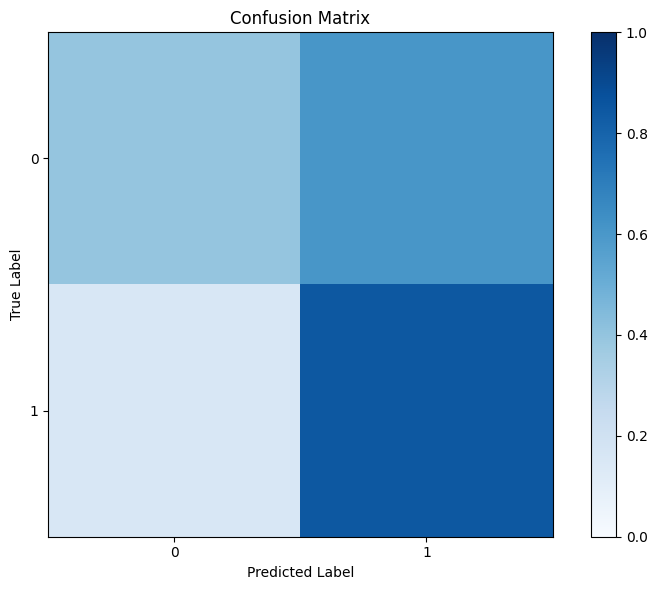

In [23]:
num_classes = len(np.unique(y_train))
y_pred = clf_model.predict(process_for_resnet(x_test))
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

class_sums = cm.sum(axis=1, keepdims=True)
conf_matrix_normalized = cm / class_sums

print(conf_matrix_normalized)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_normalized, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes))
plt.yticks(tick_marks, range(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [ ]:
#np.save("resnet50_conf_matrix_seed42.npy", conf_matrix_normalized)

## ResNet18

In [29]:
def resnet_block(inputs, filters, kernel_size=3, stride=1, activation='relu'):
    """A single ResNet block."""
    x = Conv2D(filters, kernel_size, strides=stride, padding='same', use_bias=False)(inputs)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    
    x = Conv2D(filters, kernel_size, strides=1, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    
    # Shortcut connection
    if stride != 1 or inputs.shape[-1] != filters:
        shortcut = Conv2D(filters, 1, strides=stride, padding='same', use_bias=False)(inputs)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = inputs
    
    x = Add()([x, shortcut])
    x = Activation(activation)(x)
    return x

def create_resnet18(input_shape=(32, 32, 3), num_classes=2):
    """Create a ResNet-18 model."""
    inputs = Input(shape=input_shape)
    
    # Initial conv layer
    x = Conv2D(64, 7, strides=2, padding='same', use_bias=False)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # ResNet blocks
    # Layer 1 (64 filters, 2 blocks)
    x = resnet_block(x, 64)
    x = resnet_block(x, 64)
    
    # Layer 2 (128 filters, 2 blocks)
    x = resnet_block(x, 128, stride=2)
    x = resnet_block(x, 128)
    
    # Layer 3 (256 filters, 2 blocks)
    x = resnet_block(x, 256, stride=2)
    x = resnet_block(x, 256)
    
    # Layer 4 (512 filters, 2 blocks)
    x = resnet_block(x, 512, stride=2)
    x = resnet_block(x, 512)
    
    # Global average pooling and classification
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, outputs)
    return model

# Create the model
num_classes = len(np.unique(y_train))
clf_model = create_resnet18(input_shape=(32, 32, 3), num_classes=num_classes)

tf.keras.utils.set_random_seed(42)

clf_model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.0001, clipvalue=0.5), metrics=["accuracy"])

clf_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 16, 16,    │      9,408 │ input_layer_6[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_40[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_34       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 16, 16,    │     36,864 │ activation_34[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_41[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_35       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_42 (Conv2D)  │ (None, 16, 16,    │     36,864 │ activation_35[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_42[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_16 (Add)        │ (None, 16, 16,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ activation_34[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_36       │ (None, 16, 16,    │          0 │ add_16[0][0]      │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_43 (Conv2D)  │ (None, 16, 16,    │     36,864 │ activation_36[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_43[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_37       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_44 (Conv2D)  │ (None, 16, 16,    │     36,864 │ activation_37[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_44[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_17 (Add)        │ (None, 16, 16,    │          0 │ batch_normalizat

 Total params: 11,449,794 (43.68 MB)

 Trainable params: 11,440,194 (43.64 MB)

 Non-trainable params: 9,600 (37.50 KB)

In [30]:
# class_weights = compute_class_weight('balanced', classes=np.unique(y_train.flatten()), y=y_train.flatten())
# class_weights = dict(enumerate(class_weights))

history = clf_model.fit(process_for_resnet(x_train), y_train, batch_size=32, epochs=100, validation_data=(process_for_resnet(x_val), y_val))


Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 180ms/step - accuracy: 0.6145 - loss: 0.7602 - val_accuracy: 0.1661 - val_loss: 0.7229
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - accuracy: 0.7242 - loss: 0.5606 - val_accuracy: 0.1661 - val_loss: 0.8891
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - accuracy: 0.8568 - loss: 0.3098 - val_accuracy: 0.1661 - val_loss: 1.1649
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - accuracy: 0.9321 - loss: 0.2016 - val_accuracy: 0.1661 - val_loss: 1.1508
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.9430 - loss: 0.1428 - val_accuracy: 0.1661 - val_loss: 1.5231
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - accuracy: 0.9403 - loss: 0.1417 - val_accuracy: 0.2022 - val_loss: 1.6385
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - accuracy: 0.9538 - loss: 0.1214 - val_accuracy: 0.3430 - val_loss: 1.7406
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - accuracy: 0.9636 - loss: 0.0883 - val_acc

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
[[0.64224138 0.35775862]
 [0.35555556 0.64444444]]


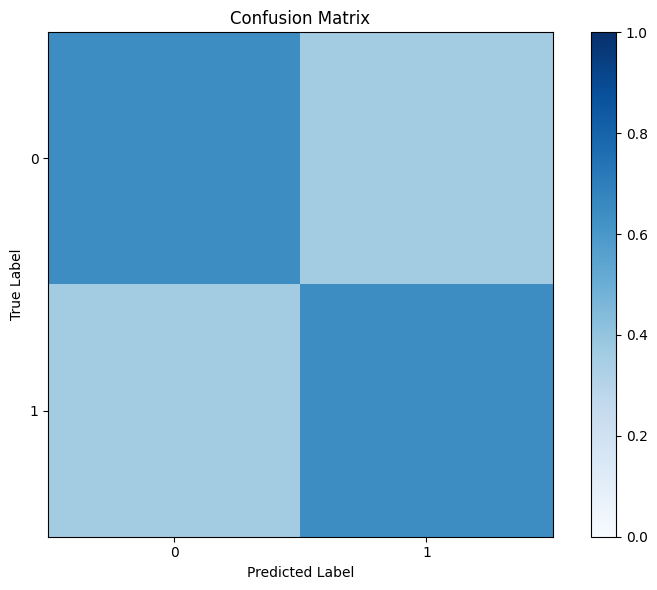

In [31]:
num_classes = len(np.unique(y_train))
y_pred = clf_model.predict(process_for_resnet(x_test))
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

class_sums = cm.sum(axis=1, keepdims=True)
conf_matrix_normalized = cm / class_sums

print(conf_matrix_normalized)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_normalized, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes))
plt.yticks(tick_marks, range(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [ ]:
#np.save("resnet18_conf_matrix_seed42.npy", conf_matrix_normalized)

## Small Custom CNN (native 20x20 input)

A lightweight CNN built from scratch for 20x20 images — no padding or upscaling required. A fairer small-scale baseline than ImageNet architectures.

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

def build_small_cnn(input_shape=(20, 20, 1), num_classes=2):
    inp = Input(shape=input_shape)
    x = Conv2D(8, (3, 3), padding='same', activation='relu')(inp)
    x = MaxPooling2D((2, 2))(x)  # -> (10, 10, 8)
    x = Conv2D(16, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)  # -> (5, 5, 16)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    out = Dense(num_classes, activation='softmax')(x)
    return Model(inp, out, name='small_cnn')

tf.keras.utils.set_random_seed(43)

num_classes = len(np.unique(y_train))
small_cnn = build_small_cnn(input_shape=(20, 20, 1), num_classes=num_classes)
small_cnn.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001, clipvalue=0.5),
    metrics=['accuracy']
)
small_cnn.summary()

Model: "small_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 20, 20, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 20, 20, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 10, 10, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        25,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,042 (105.63 KB)

 Trainable params: 27,042 (105.63 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# No preprocessing needed — native 20x20 grayscale input
x_train_cnn = np.expand_dims(x_train, axis=-1)
x_val_cnn   = np.expand_dims(x_val,   axis=-1)
x_test_cnn  = np.expand_dims(x_test,  axis=-1)

history_cnn = small_cnn.fit(
    x_train_cnn, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_val_cnn, y_val),
    verbose=1
)

Epoch 1/100


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5432 - loss: 0.6846 - val_accuracy: 0.6282 - val_loss: 0.6395
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6343 - loss: 0.6325 - val_accuracy: 0.5740 - val_loss: 0.6431
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6591 - loss: 0.6098 - val_accuracy: 0.5487 - val_loss: 0.6612
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6744 - loss: 0.5976 - val_accuracy: 0.5487 - val_loss: 0.6544
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6856 - loss: 0.5795 - val_accuracy: 0.5523 - val_loss: 0.6441
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6849 - loss: 0.5738 - val_accuracy: 0.5415 - val_loss: 0.6471
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6957 - loss: 0.5723 - val_accuracy: 0.5235 - val_loss: 0.6799
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6857 - loss: 0.5734 - val_accuracy: 0.5668 - val_loss: 0.6

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[0.59051724 0.40948276]
 [0.44444444 0.55555556]]


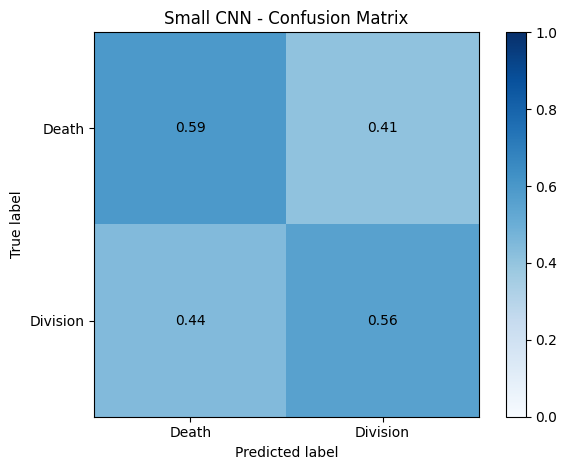

In [16]:
y_pred = small_cnn.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
class_sums = cm.sum(axis=1, keepdims=True)
conf_matrix_normalized = cm / class_sums

print(conf_matrix_normalized)

fig, ax = plt.subplots()
plt.imshow(conf_matrix_normalized, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Small CNN - Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Death', 'Division'])
plt.yticks(tick_marks, ['Death', 'Division'])
for i in range(conf_matrix_normalized.shape[0]):
    for j in range(conf_matrix_normalized.shape[1]):
        plt.text(j, i, f'{conf_matrix_normalized[i, j]:.2f}',
                 ha='center', va='center', color='black')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [ ]:
# Run for seeds 42, 44, 46 — change seed above and uncomment to save
# np.save("small_cnn_conf_matrix_seed42.npy", conf_matrix_normalized)

## Loading all 3 trained models confusion matrices

In [3]:
# imagenet_seed42 = np.load("imagenet_conf_matrix_seed42.npy")
# imagenet_seed44 = np.load("imagenet_conf_matrix_seed44.npy")
# imagenet_seed46 = np.load("imagenet_conf_matrix_seed46.npy")

resnet50_seed42 = np.load("resnet50_conf_matrix_seed42.npy")
resnet50_seed44 = np.load("resnet50_conf_matrix_seed44.npy")
resnet50_seed46 = np.load("resnet50_conf_matrix_seed46.npy")

resnet18_seed42 = np.load("resnet18_conf_matrix_seed42.npy")
resnet18_seed44 = np.load("resnet18_conf_matrix_seed44.npy")
resnet18_seed46 = np.load("resnet18_conf_matrix_seed46.npy")

ai4cellfate_seed42 = np.load("/Users/inescunha/Documents/GitHub/AI4CellFate/results/s1_ep35_lr5_la1_seed42_ldim2_s2_lr6_la4_lc1_lcon8/confusion_matrix_values_epoch_52.npy")
ai4cellfate_seed44 = np.load("/Users/inescunha/Documents/GitHub/AI4CellFate/results/s1_ep35_lr5_la1_seed48_ldim2_s2_lr6_la4_lc1_lcon8/confusion_matrix_values_epoch_53.npy")
ai4cellfate_seed46 = np.load("/Users/inescunha/Documents/GitHub/AI4CellFate/results/s1_ep35_lr5_la1_seed46_ldim2_s2_lr6_la4_lc1_lcon8/confusion_matrix_values_epoch_50.npy")

#conf_matrix_imagenet = np.stack([imagenet_seed42, imagenet_seed44, imagenet_seed46], axis=0)
conf_matrix_ai4cellfate = np.stack([ai4cellfate_seed42, ai4cellfate_seed44, ai4cellfate_seed46], axis=0)
conf_matrix_resnet50 = np.stack([resnet50_seed42, resnet50_seed44, resnet50_seed46], axis=0)
conf_matrix_resnet18 = np.stack([resnet18_seed42, resnet18_seed44, resnet18_seed46], axis=0)

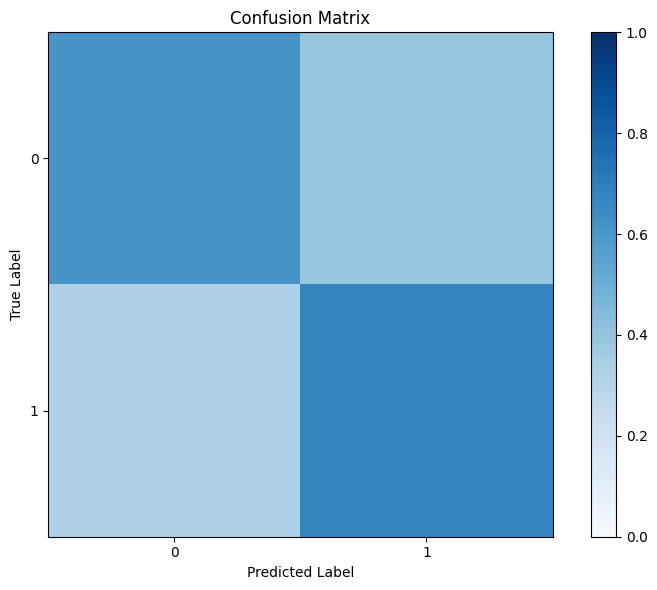

In [6]:
mean_conf_restnet50 = np.mean(conf_matrix_resnet50,axis=0)
num_classes = len(np.unique(y_train))
plt.figure(figsize=(8, 6))
plt.imshow(mean_conf_restnet50, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes))
plt.yticks(tick_marks, range(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

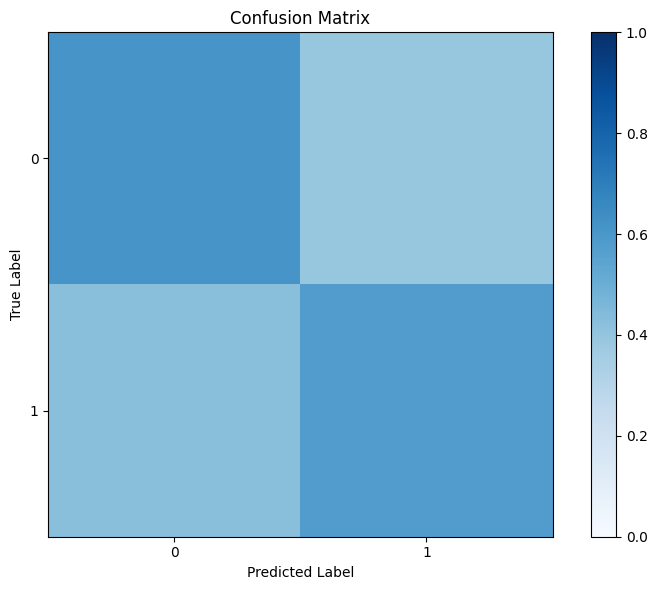

In [7]:
mean_conf_resnet18 = np.mean(conf_matrix_resnet18,axis=0)

plt.figure(figsize=(8, 6))
plt.imshow(mean_conf_resnet18, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes))
plt.yticks(tick_marks, range(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [39]:
# Compute precision (class 0) and accuracy (mean diagonal) for both models across seeds
import numpy as np

# Expect these to be defined from previous cells:
# conf_matrix_imagenet: shape (3, 2, 2)
# conf_matrix_ai4cellfate: shape (3, 2, 2)

assert 'conf_matrix_resnet50' in globals(), 'conf_matrix_resnet50 not found.'
assert 'conf_matrix_resnet18' in globals(), 'conf_matrix_resnet18 not found.'
assert 'conf_matrix_ai4cellfate' in globals(), 'conf_matrix_ai4cellfate not found.'

# Functions consistent with earlier definition (using normalized confusion matrices)
def compute_metrics_from_cm(cm_norm):
    # Accuracy as mean diagonal
    acc = float(np.mean(np.diag(cm_norm)))
    # Precision for class 0 (per prior convention)
    denom = (cm_norm[0, 0] + cm_norm[1, 0])
    prec = float(cm_norm[0, 0] / denom) if denom > 0 else np.nan
    return acc, prec

# Per-seed arrays
acc_resnet50 = []
prec_resnet50 = []
acc_resnet18 = []
prec_resnet18 = []
acc_ai4cf = []
prec_ai4cf = []

for i in range(conf_matrix_resnet50.shape[0]):
    a, p = compute_metrics_from_cm(conf_matrix_resnet50[i])
    acc_resnet50.append(a)
    prec_resnet50.append(p)

for i in range(conf_matrix_resnet18.shape[0]):
    a, p = compute_metrics_from_cm(conf_matrix_resnet18[i])
    acc_resnet18.append(a)
    prec_resnet18.append(p)


for i in range(conf_matrix_ai4cellfate.shape[0]):
    a, p = compute_metrics_from_cm(conf_matrix_ai4cellfate[i])
    acc_ai4cf.append(a)
    prec_ai4cf.append(p)

acc_resnet50 = np.array(acc_resnet50)
prec_resnet50 = np.array(prec_resnet50)
acc_resnet18 = np.array(acc_resnet18)
prec_resnet18 = np.array(prec_resnet18)
acc_ai4cf = np.array(acc_ai4cf)
prec_ai4cf = np.array(prec_ai4cf)

# Means and STDs for bar plot
accuracy_resnet50_mean = float(np.nanmean(acc_resnet50))
accuracy_resnet50_std = float(np.nanstd(acc_resnet50))
precision_resnet50_mean = float(np.nanmean(prec_resnet50))
precision_resnet50_std = float(np.nanstd(prec_resnet50))

accuracy_resnet18_mean = float(np.nanmean(acc_resnet18))
accuracy_resnet18_std = float(np.nanstd(acc_resnet18))
precision_resnet18_mean = float(np.nanmean(prec_resnet18))
precision_resnet18_std = float(np.nanstd(prec_resnet18))

accuracy_ai4cellfate_mean = float(np.nanmean(acc_ai4cf))
accuracy_ai4cellfate_std = float(np.nanstd(acc_ai4cf))
precision_ai4cellfate_mean = float(np.nanmean(prec_ai4cf))
precision_ai4cellfate_std = float(np.nanstd(prec_ai4cf))

print('ResNet50  - Acc: {:.4f} ± {:.4f}, Prec0: {:.4f} ± {:.4f}'.format(
    accuracy_resnet50_mean, accuracy_resnet50_std, precision_resnet50_mean, precision_resnet50_std))
print('ResNet18  - Acc: {:.4f} ± {:.4f}, Prec0: {:.4f} ± {:.4f}'.format(
    accuracy_resnet18_mean, accuracy_resnet18_std, precision_resnet18_mean, precision_resnet18_std))
print('AI4CellFate - Acc: {:.4f} ± {:.4f}, Prec0: {:.4f} ± {:.4f}'.format(
    accuracy_ai4cellfate_mean, accuracy_ai4cellfate_std, precision_ai4cellfate_mean, precision_ai4cellfate_std))

# Bundle for convenient downstream plotting
# metrics_summary = {
#     'imagenet': {
#         'accuracy': {'mean': accuracy_imagenet_mean, 'std': accuracy_imagenet_std, 'per_seed': acc_imagenet},
#         'precision_class0': {'mean': precision_imagenet_mean, 'std': precision_imagenet_std, 'per_seed': prec_imagenet},
#     },
#     'ai4cellfate': {
#         'accuracy': {'mean': accuracy_ai4cellfate_mean, 'std': accuracy_ai4cellfate_std, 'per_seed': acc_ai4cf},
#         'precision_class0': {'mean': precision_ai4cellfate_mean, 'std': precision_ai4cellfate_std, 'per_seed': prec_ai4cf},
#     }
# }

# Example arrays ready for bar plot cell
bar_models = ['ResNet50', 'ResNet18', 'AI4CellFate']
bar_accuracy_means = [accuracy_resnet50_mean, accuracy_resnet18_mean, accuracy_ai4cellfate_mean]
bar_accuracy_stds = [accuracy_resnet50_std, accuracy_resnet18_std,accuracy_ai4cellfate_std]
bar_precision_means = [precision_resnet50_mean, precision_resnet18_mean, precision_ai4cellfate_mean]
bar_precision_stds = [precision_resnet50_std, precision_resnet18_std, precision_ai4cellfate_std]


ResNet50  - Acc: 0.6402 ± 0.0146, Prec0: 0.6619 ± 0.0402
ResNet18  - Acc: 0.5935 ± 0.0356, Prec0: 0.5914 ± 0.0371
AI4CellFate - Acc: 0.7177 ± 0.0034, Prec0: 0.7187 ± 0.0122


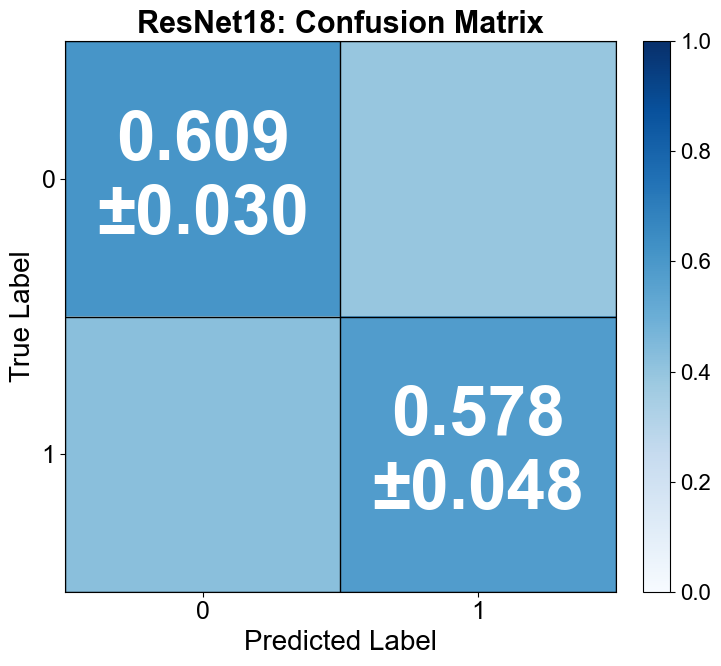

In [12]:
# Annotated mean confusion matrix with ± std (across 3 seeds)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Compute mean and std across seeds
mean_cm = np.mean(conf_matrix_resnet18, axis=0)
std_cm = np.std(conf_matrix_resnet18, axis=0)

# Use Arial and larger fonts
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 18

fig, ax = plt.subplots(figsize=(8, 7))
im = ax.imshow(mean_cm, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=1)

# Title and labels
ax.set_title('ResNet18: Confusion Matrix', fontsize=22, fontweight='bold')
num_classes = mean_cm.shape[0]
ax.set_xlabel('Predicted Label', fontsize=20)
ax.set_ylabel('True Label', fontsize=20)
ax.set_xticks(np.arange(num_classes))
ax.set_yticks(np.arange(num_classes))
ax.set_xticklabels([str(i) for i in range(num_classes)], fontsize=18)
ax.set_yticklabels([str(i) for i in range(num_classes)], fontsize=18)

# Grid lines for clarity
ax.set_xticks(np.arange(-0.5, num_classes, 1), minor=True)
ax.set_yticks(np.arange(-0.5, num_classes, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
ax.tick_params(which='minor', bottom=False, left=False)

# Colorbar
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=16)

# Annotate ONLY diagonal cells with mean ± std in WHITE
for i in range(num_classes):
    for j in range(num_classes):
        if i == j:  # Only show values on the diagonal
            text = f"{mean_cm[i, j]:.3f}\n±{std_cm[i, j]:.3f}"
            ax.text(j, i, text, ha='center', va='center', color='white', fontsize=50, fontweight='bold')

plt.tight_layout()
#plt.savefig("resnet18_conf_matrix.eps", dpi=300, bbox_inches="tight")
plt.show()

/var/folders/ds/_m8m03r135b5r67hc6xgtxt00000gn/T/ipykernel_12870/1916070779.py:47: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_patches = [plt.Rectangle((0,0),1,1, color=color, edgecolor='black') for color in colors]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


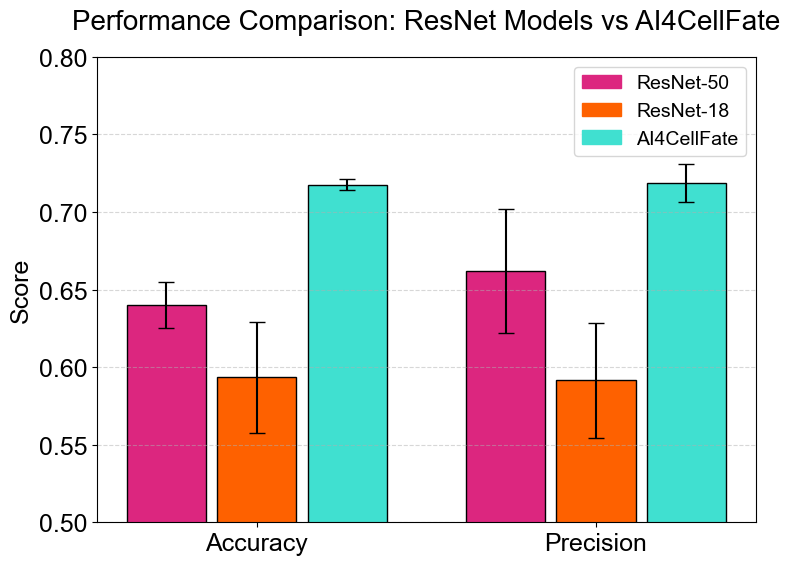

In [38]:
# Compute means and standard deviations - all three models
means_precision = bar_precision_means  # [ResNet50, ResNet18, AI4CellFate]
std_precision = bar_precision_stds
means_accuracy = bar_accuracy_means
std_accuracy = bar_accuracy_stds

# Model names for labeling
model_names = ['ResNet-50', 'ResNet-18', 'AI4CellFate']

# X positions for bars - two separate groups
x_accuracy = np.array([0, 0.8, 1.6])  # Accuracy bars (3 bars close together)
x_precision = np.array([3.0, 3.8, 4.6])  # Precision bars (3 bars close together, further away)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Define bar width
bar_width = 0.7

# Colors for each model
colors = ["#DC267F", "#FE6100", "turquoise"]  # ResNet-50, ResNet-18, AI4CellFate

# Bar plots with error bars
# Accuracy group (first 3 bars)
bars_accuracy = ax.bar(x_accuracy, means_accuracy, yerr=std_accuracy, capsize=6, color=colors, 
                      edgecolor='black', width=bar_width)

# Precision group (second 3 bars)
bars_precision = ax.bar(x_precision, means_precision, yerr=std_precision, capsize=6, color=colors, 
                       edgecolor='black', width=bar_width)

# X-axis labels - center under each group
ax.set_xticks([0.8, 3.8])  # Center of accuracy group and precision group
ax.set_xticklabels(["Accuracy", "Precision"], fontsize=16, fontname='Arial')

# Y-axis label
ax.set_ylabel("Score", fontsize=18, fontname='Arial')

# Y-axis ticks (bigger font)
ax.tick_params(axis='y', labelsize=18)

# Title with extra spacing
ax.set_title("Performance Comparison: ResNet Models vs AI4CellFate", fontsize=20, fontname='Arial', pad=20)

# Legend for the three models
legend_labels = ["ResNet-50", "ResNet-18", "AI4CellFate"]
legend_patches = [plt.Rectangle((0,0),1,1, color=color, edgecolor='black') for color in colors]
ax.legend(legend_patches, legend_labels, loc="upper right", fontsize=14)

# Set y-axis limit
ax.set_ylim(0.5, 0.8)

plt.xticks(fontsize=18, fontname="Arial")
plt.yticks(fontsize=18, fontname="Arial")

# Grid
ax.yaxis.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
#plt.savefig("resnet_ai4cellfate_comparison.eps", dpi=300, bbox_inches="tight")
plt.show()